---
# PROJET 4 - Etude de santé publique - Food and Agriculture Organization  of the United States
---

## **Partie 1**

### **1. Importation des librairies**
---

In [1]:
# Différentes librairies qui seront utilisées pour ce projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

### **2. Importation et préparation des fichiers CSV**
---

#### *2.1. Disponibilité alimentaire*

In [2]:
data_dispo_alim = pd.read_csv('dispo_alimentaire.csv') # Disponibilté alimentaire

In [3]:
# CSV Disponibilité alimentaire
df_dispo_alim = data_dispo_alim.copy()

# Renommage des colonnes
mapping_dispo_alim = {'Aliments pour animaux' : 'Aliments_animaux', 'Autres Utilisations' : 'Autres_utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)' : 'Dispo_kcal_(kcal_pers_jour)',
           'Disponibilité alimentaire en quantité (kg/personne/an)' : 'Dispo_qte_(kg_pers_an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)' : 'Dispo_mg_(g_pers_j)',
           'Disponibilité de protéines en quantité (g/personne/jour)' : 'Dispo_prot_(g_pers_j)', 'Disponibilité intérieure' : 'Dispo_int_(milliers)', 'Exportations - Quantité' : 'Export_(milliers)',
           'Importations - Quantité' : 'Import_(milliers)', 'Nourriture' : 'Nourriture_(milliers)', 'Pertes' : 'Pertes_(milliers)', 'Production' : 'Production_(milliers)', 'Semences' : 'Semences_(milliers)',
           'Traitement' : 'Traitement_(milliers)', 'Variation de stock' : 'Variation_stock_(milliers)'}

df_dispo_alim.rename(columns = mapping_dispo_alim, inplace = True)
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


#### *2.2. Sous nutrition*

In [4]:
data_sous_nutr = pd.read_csv('sous_nutrition.csv') # Données de sous nutrition en millions

In [5]:
data_sous_nutr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [6]:
# df sous nutrition nettoyé rapidement
# Modification des années
df_sous_nut = data_sous_nutr.copy()
df_sous_nut['Année'] = df_sous_nut['Année'].str.split('-').apply(lambda x: (int(x[0])+int(x[1]))/2).astype('int')
# Changement des valeurs <0.1
df_sous_nut['Valeur'] = df_sous_nut['Valeur'].replace('<0.1', np.nan).astype('float') # On peux aussi remplacer par 0 ça ne change pas le calcul
# df_sous_nut['Valeur'].fillna(0) # On remplaceles NaN par 0 (possibilité aussi de faire un calcul d'imputation avec la proportion moyenne de l'année)

# Renommage des colonnes
df_sous_nut = df_sous_nut.rename(columns = {'Valeur' : 'Sous_nutrition_(milliers)'})
df_sous_nut['Sous_nutrition_(milliers)'] = df_sous_nut['Sous_nutrition_(milliers)']*1000
df_sous_nut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Zone                       1218 non-null   object 
 1   Année                      1218 non-null   int32  
 2   Sous_nutrition_(milliers)  504 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 23.9+ KB


In [7]:
# Préparation pour code fait avec Thomas
# Modification des années
df_sous_nut_prep = data_sous_nutr.copy()
df_sous_nut_prep['Année'] = df_sous_nut_prep['Année'].str.split('-').apply(lambda x: (int(x[0])+int(x[1]))/2).astype('int')

# Renommage des colonnes
df_sous_nut_prep = df_sous_nut_prep.rename(columns = {'Valeur' : 'Sous_Nutrition_(millions)'})

df_sous_nut_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Zone                       1218 non-null   object
 1   Année                      1218 non-null   int32 
 2   Sous_Nutrition_(millions)  624 non-null    object
dtypes: int32(1), object(2)
memory usage: 23.9+ KB


In [8]:
df_sous_nut_prep.loc[df_sous_nut_prep['Sous_Nutrition_(millions)'] == '<0.1']

,Zone,Année,Sous_Nutrition_(millions)
60,Arménie,2013,<0.1
61,Arménie,2014,<0.1
62,Arménie,2015,<0.1
63,Arménie,2016,<0.1
64,Arménie,2017,<0.1
...,...,...,...
1183,Vanuatu,2014,<0.1
1184,Vanuatu,2015,<0.1
1185,Vanuatu,2016,<0.1
1186,Vanuatu,2017,<0.1


#### *2.3. Population*

In [9]:
data_population = pd.read_csv('population.csv') # Population mondiale en milliers
df_pop = data_population.copy()
# Modification nom colonnes
df_pop = df_pop.rename(columns = {'Valeur' : 'Population_(milliers)'})

df_pop.head()

,Zone,Année,Population_(milliers)
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


#### *2.4. Aide alimentaire*

In [10]:
data_aide_alim = pd.read_csv('aide_alimentaire.csv') # Aide alimentaire reçue par les pays

In [11]:
df_aide_alim = data_aide_alim.copy()
# Modification noms colonnes
mapping_aide_alim = {'Pays bénéficiaire' : 'Pays_beneficiaire', 'Valeur' : 'Qte_aide_(tonnes)'}
df_aide_alim.rename(columns = mapping_aide_alim, inplace = True)

df_aide_alim.head()

,Pays_beneficiaire,Année,Produit,Qte_aide_(tonnes)
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


#### *2.5. Nettoyage sous nutrition version avancée*

In [12]:
# On met Zone et Année en index pour faciliter le merge
df_sous_nut_prep = df_sous_nut_prep.set_index(['Zone', 'Année'])
df_pop = df_pop.set_index(['Zone', 'Année'])

In [13]:
# Merge entre sous nutrition et population sur les index
df_sous_nut_pop = pd.merge(right=df_sous_nut_prep, left=df_pop, right_index=True, left_index=True)
df_sous_nut_pop = df_sous_nut_pop.reset_index(level=0)

# Création des différents filtres, <0.1 et NaN
mask = df_sous_nut_pop['Sous_Nutrition_(millions)'] == '<0.1'
print(df_sous_nut_pop.loc[mask].shape)
na_mask = df_sous_nut_pop['Sous_Nutrition_(millions)'].isna()
known_sous_nut = df_sous_nut_pop.loc[~(mask | na_mask)]

# Compute avg_sous_nut whatever the groupby is (year, country)
def gb_avg_sous_nut(sub_df):
    num = (sub_df['Sous_Nutrition_(millions)'].astype(float) * 1000).sum() 
    denom = sub_df['Population_(milliers)'].sum()
    return num/denom

# Return a dict of avg_sous_nut per year using pre-defined function
sous_nut_per_year = known_sous_nut.groupby(level=0).apply(gb_avg_sous_nut).to_dict()
print(sous_nut_per_year)

df_sous_nut_pop['%Sous_Nut'] = df_sous_nut_pop.index.map(sous_nut_per_year)
df_sous_nut_pop['Sous_Nutrition_(milliers)'] = df_sous_nut_pop['Sous_Nutrition_(millions)'].replace('<0.1', np.nan).astype('float') * 1000
replacement_values = df_sous_nut_pop['Population_(milliers)'] * df_sous_nut_pop['%Sous_Nut'] 
df_sous_nut_pop['Sous_Nutrition_(milliers)'] = df_sous_nut_pop['Sous_Nutrition_(milliers)'].fillna(replacement_values)

# Check for outliers: sous_nut_(milliers) > 100 quand Sous_Nut_millions < 0.1
mask = (df_sous_nut_pop['Sous_Nutrition_(millions)'] == '<0.1') & (df_sous_nut_pop['Sous_Nutrition_(milliers)'] >= 100)
print(df_sous_nut_pop.loc[mask].shape)

# Remplacement des outliers par 99
df_sous_nut_pop.loc[mask, 'Sous_Nutrition_(milliers)'] = 99

# Finally compute the average sous nutrition for 2017
df_sous_nut_pop.loc[2017, 'Sous_Nutrition_(milliers)'].sum()/df_sous_nut_pop.loc[2017, 'Population_(milliers)'].sum()

# Remise des index à zéro
df_sous_nut_prep = df_sous_nut_prep.reset_index()
df_pop = df_pop.reset_index()
df_sous_nut_pop = df_sous_nut_pop.reset_index()

(120, 3)
{2013: 0.13519952154002973, 2014: 0.1339502218596799, 2015: 0.12967879049488268, 2016: 0.13011801142400695, 2017: 0.12852829788640402, 2018: 0.12868241230795904}
(40, 5)


In [14]:
# Visu après imputation des données
df_sous_nut_pop.loc[df_sous_nut_pop['Sous_Nutrition_(millions)'] == '<0.1']

,Année,Zone,Population_(milliers),Sous_Nutrition_(millions),%Sous_Nut,Sous_Nutrition_(milliers)
60,2013,Arménie,2897.588,<0.1,0.135200,99.000000
61,2014,Arménie,2912.409,<0.1,0.133950,99.000000
62,2015,Arménie,2925.553,<0.1,0.129679,99.000000
63,2016,Arménie,2936.143,<0.1,0.130118,99.000000
64,2017,Arménie,2944.791,<0.1,0.128528,99.000000
...,...,...,...,...,...,...
1183,2014,Vanuatu,263.888,<0.1,0.133950,35.347856
1184,2015,Vanuatu,271.130,<0.1,0.129679,35.159810
1185,2016,Vanuatu,278.330,<0.1,0.130118,36.215746
1186,2017,Vanuatu,285.510,<0.1,0.128528,36.696114


## **Partie 2**

### **1. Proportion de sous-nutrition**
---

#### *1.1. Au niveau mondial*

In [15]:
df_sous_nut.head() # Avec nettoyage basique

,Zone,Année,Sous_nutrition_(milliers)
0,Afghanistan,2013,8600.0
1,Afghanistan,2014,8800.0
2,Afghanistan,2015,8900.0
3,Afghanistan,2016,9700.0
4,Afghanistan,2017,10500.0


In [16]:
df_pop.head()

,Zone,Année,Population_(milliers)
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [17]:
# On prend pour l'année 2017
df_pop_2017 = df_pop.loc[df_pop['Année'] == 2017]
df_sous_nut_2017 = df_sous_nut.loc[df_sous_nut['Année'] == 2017].copy() # A reprendre pour dashboard global

In [18]:
df_sous_nut_2017['Sous_nutrition_(milliers)'].isna().sum() # Nombre de données manquantes

119

In [19]:
pop_2017 = df_pop_2017['Population_(milliers)'].sum()
print(int(pop_2017)*1000)
sn_2017 = df_sous_nut_2017['Sous_nutrition_(milliers)'].sum()
print(int(sn_2017)*1000)

7548134000
535700000


In [20]:
prop_sous_nut = round((sn_2017*100)/pop_2017, 2)
print('Dans le monde ', prop_sous_nut, '% de la population sont en insécurité alimentaire')

Dans le monde  7.1 % de la population sont en insécurité alimentaire


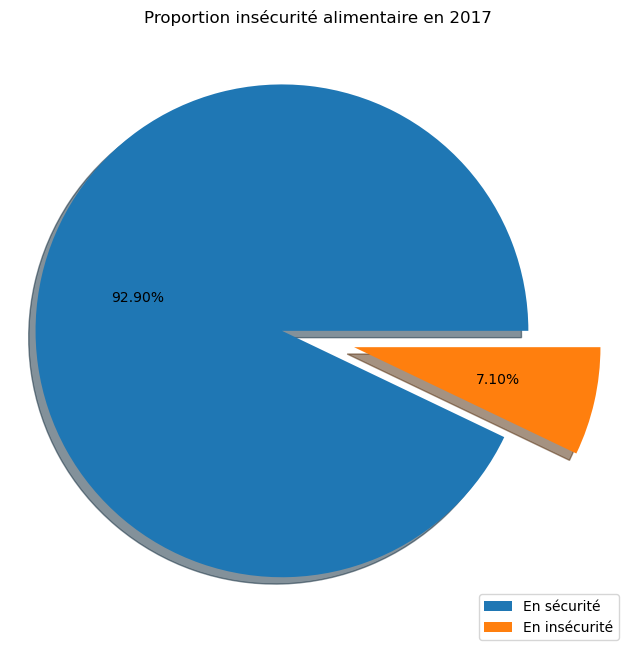

In [120]:
# Visu avec graph de  la proportion
a = 100-prop_sous_nut
b = prop_sous_nut
x = [a, b]

fig, ax = plt.subplots(1, 1, figsize = (14,8))

plt.pie(x, explode = (0.15, 0.15), autopct = '%1.2f%%', shadow = True) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc = 'lower right', labels = ['En sécurité', 'En insécurité'])

plt.title('Proportion insécurité alimentaire en 2017')
plt.show()

In [22]:
# Avec le df nettoyage avancé
df_sous_nut_pop_2017_ta = df_sous_nut_pop.loc[df_sous_nut_pop['Année'] == 2017].copy() # Avec nettoyage avancé et sélection de l'année 2017
df_sous_nut_pop_2017_ta.loc[df_sous_nut_pop_2017_ta['Sous_Nutrition_(millions)'] == '<0.1']

,Année,Zone,Population_(milliers),Sous_Nutrition_(millions),%Sous_Nut,Sous_Nutrition_(milliers)
64,2017,Arménie,2944.791,<0.1,0.128528,99.000000
106,2017,Barbade,286.232,<0.1,0.128528,36.788912
124,2017,Belize,375.769,<0.1,0.128528,48.296950
196,2017,Cabo Verde,537.498,<0.1,0.128528,69.083703
232,2017,Chine - RAS de Macao,622.585,<0.1,0.128528,80.019790
250,2017,Chypre,1179.678,<0.1,0.128528,99.000000
310,2017,Dominique,71.458,<0.1,0.128528,9.184375
382,2017,Fidji,877.459,<0.1,0.128528,99.000000
466,2017,Guyana,775.222,<0.1,0.128528,99.637964
502,2017,Îles Salomon,636.039,<0.1,0.128528,81.749010


In [23]:
# Comptage des NaN sur la colonne sous nutrition milliers
df_sous_nut_pop_2017_ta['Sous_Nutrition_(milliers)'].isna().sum()

0

In [24]:
pop = df_sous_nut_pop_2017_ta['Population_(milliers)'].sum()
sous_nut = df_sous_nut_pop_2017_ta['Sous_Nutrition_(milliers)'].sum()
prct = (sous_nut*100)/pop
print('Population mondiale :', int(pop)*1000)
print('Population en insécurité alimentaire :', int(sous_nut)*1000)
print('Dans le monde', round(prct, 2), '% de la population sont en insécurité alimentaire')


Population mondiale : 7543798000
Population en insécurité alimentaire : 968934000
Dans le monde 12.84 % de la population sont en insécurité alimentaire


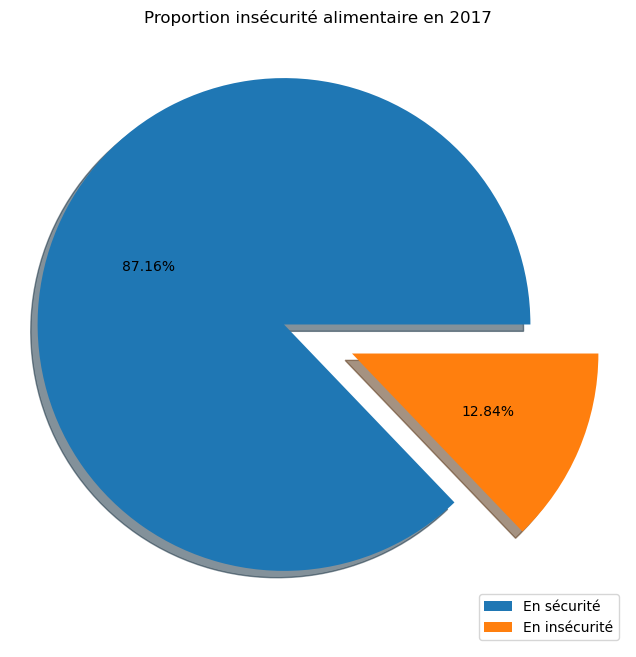

In [25]:
# Visu avec graph de  la proportion
a = 100-prct
b = prct
x = [a, b]

fig, ax = plt.subplots(1, 1, figsize = (14,8))

plt.pie(x, explode = (0.15, 0.15), autopct = '%1.2f%%', shadow = True) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc = 'lower right', labels = ['En sécurité', 'En insécurité'])

plt.title('Proportion insécurité alimentaire en 2017')
plt.show()

#### *1.2. Par pays*

In [26]:
# Avec nettoyage de base
df_sous_nut_pop_2017 = pd.merge(left=df_sous_nut_2017, right=df_pop_2017, how='outer', on='Zone')
df_sous_nut_pop_2017.drop(columns = ['Année_x'], inplace = True)
df_sous_nut_pop_2017.rename(columns = {'Année_y': 'Année'}, inplace = True)
# df_sous_nut_pop_2017['Sous_nutrition_(milliers)'] = df_sous_nut_pop_2017['Sous_nutrition_(milliers)'].fillna(0) # Si on veux passer les NaN à 0
df_sous_nut_pop_2017['Proportion_%'] = round((df_sous_nut_pop_2017['Sous_nutrition_(milliers)']*100)/df_sous_nut_pop_2017['Population_(milliers)'], 2)
df_sous_nut_pop_2017

,Zone,Sous_nutrition_(milliers),Année,Population_(milliers),Proportion_%
0,Afghanistan,10500.0,2017,36296.113,28.93
1,Afrique du Sud,3100.0,2017,57009.756,5.44
2,Albanie,100.0,2017,2884.169,3.47
3,Algérie,1300.0,2017,41389.189,3.14
4,Allemagne,NaN,2017,82658.409,NaN
...,...,...,...,...,...
231,Saint-Marin,NaN,2017,33.671,NaN
232,Saint-Martin (partie française),NaN,2017,36.560,NaN
233,Saint-Pierre-et-Miquelon,NaN,2017,5.887,NaN
234,Saint-Siège,NaN,2017,0.793,NaN


In [27]:
print('Top 10 des pays avec le plus de sous-nutrition')
df_sous_nut_pop_2017.sort_values(by = 'Proportion_%', ascending = False).head(10)

Top 10 des pays avec le plus de sous-nutrition


,Zone,Sous_nutrition_(milliers),Année,Population_(milliers),Proportion_%
78,Haïti,5300.0,2017,10982.366,48.26
157,République populaire démocratique de Corée,12000.0,2017,25429.825,47.19
108,Madagascar,10500.0,2017,25570.512,41.06
103,Libéria,1800.0,2017,4702.226,38.28
100,Lesotho,800.0,2017,2091.534,38.25
183,Tchad,5700.0,2017,15016.753,37.96
161,Rwanda,4200.0,2017,11980.961,35.06
121,Mozambique,9400.0,2017,28649.018,32.81
186,Timor-Leste,400.0,2017,1243.258,32.17
0,Afghanistan,10500.0,2017,36296.113,28.93


In [28]:
print('Top 10 des pays avec le moins de sous-nutrition') # Bcp de 0% car nettoyage en remplaçant par 0
df_sous_nut_pop_2017.loc[df_sous_nut_pop_2017['Proportion_%'] > 0].sort_values(by = 'Proportion_%', ascending = True).head(10)

Top 10 des pays avec le moins de sous-nutrition


,Zone,Sous_nutrition_(milliers),Année,Population_(milliers),Proportion_%
29,Bulgarie,200.0,2017,7102.444,2.82
135,Ouzbékistan,900.0,2017,31959.785,2.82
3,Algérie,1300.0,2017,41389.189,3.14
54,Émirats arabes unis,300.0,2017,9487.203,3.16
109,Malaisie,1000.0,2017,31104.646,3.21
36,Chili,600.0,2017,18470.439,3.25
195,Ukraine,1500.0,2017,44487.709,3.37
9,Argentine,1500.0,2017,43937.140,3.41
192,Turkménistan,200.0,2017,5757.667,3.47
2,Albanie,100.0,2017,2884.169,3.47


In [29]:
# Avec nettoyage version avancée

In [30]:
df_sous_nut_pop_2017_ta['%Sous_nut_pays'] = (df_sous_nut_pop_2017_ta['Sous_Nutrition_(milliers)']*100)/df_sous_nut_pop_2017_ta['Population_(milliers)']
df_sous_nut_pop_2017_ta.sort_values(by = '%Sous_nut_pays', ascending = False).head(10)

,Année,Zone,Population_(milliers),Sous_Nutrition_(millions),%Sous_Nut,Sous_Nutrition_(milliers),%Sous_nut_pays
472,2017,Haïti,10982.366,5.3,0.128528,5300.0,48.259182
946,2017,République populaire démocratique de Corée,25429.825,12,0.128528,12000.0,47.188685
652,2017,Madagascar,25570.512,10.5,0.128528,10500.0,41.062924
622,2017,Libéria,4702.226,1.8,0.128528,1800.0,38.279742
604,2017,Lesotho,2091.534,0.8,0.128528,800.0,38.249438
1102,2017,Tchad,15016.753,5.7,0.128528,5700.0,37.957606
970,2017,Rwanda,11980.961,4.2,0.128528,4200.0,35.055619
730,2017,Mozambique,28649.018,9.4,0.128528,9400.0,32.810898
1120,2017,Timor-Leste,1243.258,0.4,0.128528,400.0,32.173531
4,2017,Afghanistan,36296.113,10.5,0.128528,10500.0,28.928718


In [31]:
df_sous_nut_pop_2017_ta.sort_values(by = '%Sous_nut_pays', ascending = True).head(10)

,Année,Zone,Population_(milliers),Sous_Nutrition_(millions),%Sous_Nut,Sous_Nutrition_(milliers),%Sous_nut_pays
178,2017,Bulgarie,7102.444,0.2,0.128528,200.0,2.815932
814,2017,Ouzbékistan,31959.785,0.9,0.128528,900.0,2.816039
22,2017,Algérie,41389.189,1.3,0.128528,1300.0,3.140917
328,2017,Émirats arabes unis,9487.203,0.3,0.128528,300.0,3.162154
658,2017,Malaisie,31104.646,1,0.128528,1000.0,3.214954
220,2017,Chili,18470.439,0.6,0.128528,600.0,3.248434
64,2017,Arménie,2944.791,<0.1,0.128528,99.0,3.361868
1174,2017,Ukraine,44487.709,1.5,0.128528,1500.0,3.371718
58,2017,Argentine,43937.140,1.5,0.128528,1500.0,3.413968
16,2017,Albanie,2884.169,0.1,0.128528,100.0,3.467203


#### *1.3. Visualisation*

In [32]:
# Import des cartes geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")] # On enlève la ou il n'y a personne
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [33]:
# Recherche de liaison entre code pays iso a3
data_code_pays = pd.read_csv('code_pays.csv', header=None) # Code  pays
data_code_pays

,0,1,2,3,4,5
0,1,4,AF,AFG,Afghanistan,Afghanistan
1,2,8,AL,ALB,Albanie,Albania
2,3,10,AQ,ATA,Antarctique,Antarctica
3,4,12,DZ,DZA,Algérie,Algeria
4,5,16,AS,ASM,Samoa Américaines,American Samoa
...,...,...,...,...,...,...
236,237,876,WF,WLF,Wallis et Futuna,Wallis and Futuna
237,238,882,WS,WSM,Samoa,Samoa
238,239,887,YE,YEM,Yémen,Yemen
239,240,891,CS,SCG,Serbie-et-Monténégro,Serbia and Montenegro


In [34]:
# Ajout du nom des pays rapport à leurs code iso a3
world_code = pd.merge(left=world, right=data_code_pays, how='left', left_on='iso_a3', right_on=3, indicator=True) # Récupération des noms avec iso_a3 et visu du merge

# world_code
world_code.loc[world_code['_merge'] == 'both']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,0,1,2,3,4,5,_merge
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",72.0,242.0,FJ,FJI,Fidji,Fiji,both
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",230.0,834.0,TZ,TZA,République-Unie de Tanzanie,United Republic Of Tanzania,both
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",204.0,732.0,EH,ESH,Sahara Occidental,Western Sahara,both
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",37.0,124.0,CA,CAN,Canada,Canada,both
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",231.0,840.0,US,USA,États-Unis,United States,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,44269594.0,Africa,Uganda,UGA,35165,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",224.0,800.0,UG,UGA,Ouganda,Uganda,both
168,12626950.0,Africa,Rwanda,RWA,10354,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",183.0,646.0,RW,RWA,Rwanda,Rwanda,both
169,3301000.0,Europe,Bosnia and Herz.,BIH,20164,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",22.0,70.0,BA,BIH,Bosnie-Herzégovine,Bosnia and Herzegovina,both
170,2083459.0,Europe,North Macedonia,MKD,12547,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",226.0,807.0,MK,MKD,L'ex-République Yougoslave de Macédoine,The Former Yugoslav Republic of Macedonia,both


In [35]:
df_sous_nut_pop_2017_ta # df nettoyage avancé juste 2017

,Année,Zone,Population_(milliers),Sous_Nutrition_(millions),%Sous_Nut,Sous_Nutrition_(milliers),%Sous_nut_pays
4,2017,Afghanistan,36296.113,10.5,0.128528,10500.000000,28.928718
10,2017,Afrique du Sud,57009.756,3.1,0.128528,3100.000000,5.437666
16,2017,Albanie,2884.169,0.1,0.128528,100.000000,3.467203
22,2017,Algérie,41389.189,1.3,0.128528,1300.000000,3.140917
28,2017,Allemagne,82658.409,NaN,0.128528,10623.944615,12.852830
...,...,...,...,...,...,...,...
1192,2017,Venezuela (République bolivarienne du),29402.484,8,0.128528,8000.000000,27.208586
1198,2017,Viet Nam,94600.648,6.5,0.128528,6500.000000,6.870989
1204,2017,Yémen,27834.819,NaN,0.128528,3577.561908,12.852830
1210,2017,Zambie,16853.599,NaN,0.128528,2166.164393,12.852830


In [36]:
# Ajout du df de sous nutrition
df_world_sn_pop = pd.merge(left=world_code, right=df_sous_nut_pop_2017_ta, how='left', left_on=4, right_on='Zone') # Merge avec la prop de sous nutrition / pays

df_world_sn_pop

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,0,1,2,3,4,5,_merge,Année,Zone,Population_(milliers),Sous_Nutrition_(millions),%Sous_Nut,Sous_Nutrition_(milliers),%Sous_nut_pays
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",72.0,242.0,FJ,FJI,Fidji,Fiji,both,2017.0,Fidji,877.459,<0.1,0.128528,99.000000,11.282578
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",230.0,834.0,TZ,TZA,République-Unie de Tanzanie,United Republic Of Tanzania,both,2017.0,République-Unie de Tanzanie,54660.339,13.4,0.128528,13400.000000,24.515033
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",204.0,732.0,EH,ESH,Sahara Occidental,Western Sahara,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",37.0,124.0,CA,CAN,Canada,Canada,both,2017.0,Canada,36732.095,NaN,0.128528,4721.113648,12.852830
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",231.0,840.0,US,USA,États-Unis,United States,both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",217.0,780.0,TT,TTO,Trinité-et-Tobago,Trinidad and Tobago,both,2017.0,Trinité-et-Tobago,1384.059,<0.1,0.128528,99.000000,7.152874


In [37]:
# Check des années pour les données d'aide alimentaire
print(df_aide_alim['Année'].min()) # Année de départ
print(df_aide_alim['Année'].max()) # Année maximum

2013
2016


In [38]:
# Groupby et sum() par pays
df_aide_alim_gb = df_aide_alim.groupby(['Pays_beneficiaire']).sum().reset_index()
df_aide_alim_gb

,Pays_beneficiaire,Année,Qte_aide_(tonnes)
0,Afghanistan,32216,185452
1,Algérie,78561,81114
2,Angola,8054,5014
3,Bangladesh,50347,348188
4,Bhoutan,24170,2666
...,...,...,...
71,Zambie,8054,3026
72,Zimbabwe,38263,62570
73,Égypte,4026,1122
74,Équateur,10065,1362


In [39]:
# Ajout de l'aide alim depuis 2013
df_world_aide_pop = pd.merge(left=world_code, right=df_aide_alim_gb, how='left', left_on=4, right_on='Pays_beneficiaire') # Merge avec la prop de sous nutrition / pays


In [40]:
print('Nb pays dans map', len(world))
print('Nb de données manquantes dans map sous nut', df_world_sn_pop['%Sous_nut_pays'].isna().sum())
print('Nb de données manquantes dans map aide alim', df_world_aide_pop['Qte_aide_(tonnes)'].isna().sum())
# A vérifier ma table de liaison entre le iso_a3 de geopandas et mes df de projet

Nb pays dans map 176
Nb de données manquantes dans map sous nut 31
Nb de données manquantes dans map aide alim 115


Text(0.5, 1.0, 'Aide alimentaire')

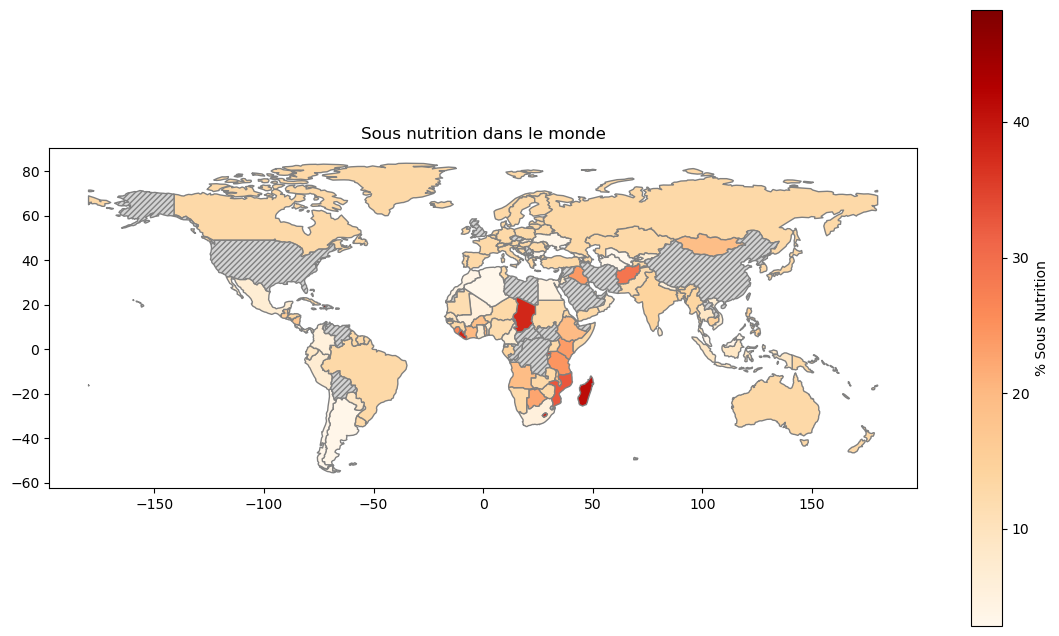

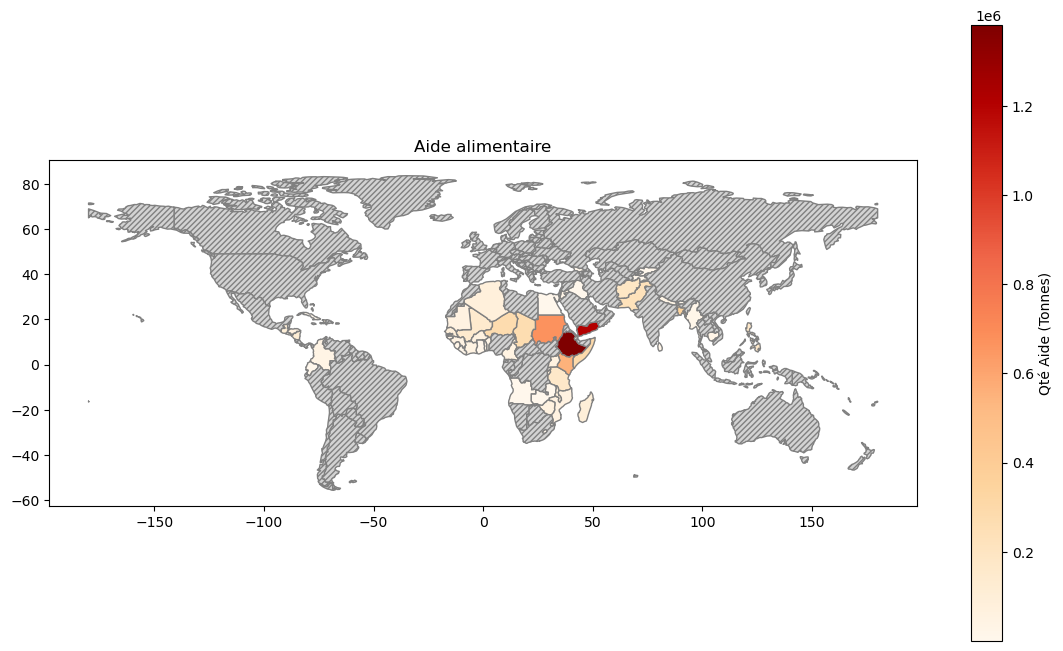

In [41]:
# Affichage des deux graph, sous nutrition et aide alimentaire avec geopandas
fig, ax = plt.subplots(1, 1, figsize = (14,8))

df_world_sn_pop.plot(column='%Sous_nut_pays', ax=ax, legend=True, legend_kwds={'label' : '% Sous Nutrition'}, missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey', 'hatch': '//////', 'label': 'Missing values'},
                     cmap='OrRd', edgecolor='grey')
plt.title('Sous nutrition dans le monde')

fig, ax = plt.subplots(1, 1, figsize = (14,8))

df_world_aide_pop.plot(column='Qte_aide_(tonnes)', ax=ax, legend=True, legend_kwds={'label' : 'Qté Aide (Tonnes)'}, missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey', 'hatch': '//////', 'label': 'Missing values'},
                       cmap='OrRd', edgecolor='grey')
plt.title('Aide alimentaire')


### **2. Nombre théorique de personnes pouvant êtres nourries**
---

In [112]:
besoin_kcal = 2500 # Besoin moyen humain en kCal/Jour/Pers

In [43]:
# Recup de la pop en 2017
df_pop_2017

,Zone,Année,Population_(milliers)
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [114]:
# Recup du df dispo alim en partant du principe que les données sont de 2017
df_dispo_alim

,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [115]:
# On fait un gb sur les pays
df_dispo_alim_gb = df_dispo_alim.groupby('Zone').sum().copy()
df_dispo_alim_gb

,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


In [116]:
# On fait un merge en outer pour avoir toutes les données
df_dispo_alim_pop = pd.merge(left=df_dispo_alim_gb, right=df_pop_2017, how='outer', on='Zone')
df_dispo_alim_pop.head()

,Zone,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers),Année,Population_(milliers)
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2017.0,36296.113
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2017.0,57009.756
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2017.0,2884.169
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2017.0,41389.189
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2017.0,82658.409


In [117]:
# On calcul le nombre de personnes théorique avec des besoin journalier définis basé sur le site vidal (2400kCal/jour), on pourrait définir une variable si on voulait changer les besoins journaliers
df_dispo_alim_pop['Population_theo'] = (df_dispo_alim_pop['Dispo_kcal_(kcal_pers_jour)']*df_dispo_alim_pop['Population_(milliers)'])/besoin_kcal
df_dispo_alim_pop

,Zone,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers),Année,Population_(milliers),Population_theo
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2017.0,36296.113,30299.995132
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2017.0,57009.756,68867.785248
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2017.0,2884.169,3677.892309
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2017.0,41389.189,54517.839751
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2017.0,82658.409,115820.962691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Soudan du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10910.763,NaN
234,Tchéquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10641.034,NaN
235,Tokélaou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1.300,NaN
236,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,101.998,NaN


In [118]:
pop_totale = df_dispo_alim_pop['Population_(milliers)'].sum()
pop_theo = df_dispo_alim_pop['Population_theo'].sum()
print('Population mondiale :', int(pop_totale))
print('Population pouvant être nourrie :', int(pop_theo))
prct_theo = round((pop_theo*100)/pop_totale, 2)
print('Pourcentage de la population mondiale pouvant être nourrie :', prct_theo, '%')

Population mondiale : 7548134
Population pouvant être nourrie : 8367593
Pourcentage de la population mondiale pouvant être nourrie : 110.86 %


#### *2.1. Avec les produits végétaux*

In [49]:
# Récup de la dispo pour les végétaux
df_dispo_vege = df_dispo_alim.loc[df_dispo_alim['Origine'] == 'vegetale'].copy()
df_dispo_vege

,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,NaN,NaN,0.0,0.01,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15596,Îles Salomon,Thé,vegetale,NaN,NaN,0.0,0.17,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15597,Îles Salomon,Tomates,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [50]:
df_dispo_vege_gb = df_dispo_vege.groupby('Zone').sum()
df_dispo_vege_gb

,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
Zone,,,,,,,,,,,,,,,
Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0
Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0
États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0


In [51]:
df_pop_2017

,Zone,Année,Population_(milliers)
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [52]:
df_dispo_vege_pop = pd.merge(df_dispo_vege_gb, df_pop_2017, how='outer', on='Zone')
df_dispo_vege_pop['Population_theo'] = (df_dispo_vege_pop['Dispo_kcal_(kcal_pers_jour)']*df_dispo_vege_pop['Population_(milliers)'])/besoin_kcal
df_dispo_vege_pop

,Zone,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers),Année,Population_(milliers),Population_theo
0,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2017.0,36296.113,28295.844760
1,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,2017.0,57009.756,60169.046645
2,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2017.0,2884.169,2647.426795
3,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,2017.0,41389.189,50270.619140
4,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,2017.0,82658.409,84759.310229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Soudan du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10910.763,NaN
234,Tchéquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10641.034,NaN
235,Tokélaou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1.300,NaN
236,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,101.998,NaN


In [53]:
pop_totale_vege = df_dispo_vege_pop['Population_(milliers)'].sum()
pop_theo_vege = df_dispo_vege_pop['Population_theo'].sum()
print('Population mondiale :', int(pop_totale_vege))
print('Population pouvant être nourrie :', int(pop_theo_vege))
prct_theo_vege = round((pop_theo_vege*100)/pop_totale_vege, 2)
print('Pourcentage de la population mondiale pouvant être nourrie :', prct_theo_vege, '%')

Population mondiale : 7548134
Population pouvant être nourrie : 7191985
Pourcentage de la population mondiale pouvant être nourrie : 95.28 %


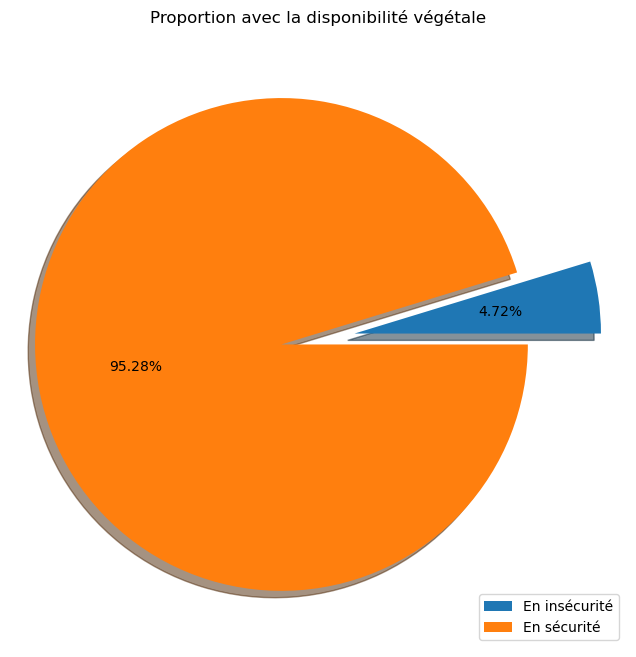

In [54]:
# Visu avec graph de  la proportion
a = 100-prct_theo_vege
b = prct_theo_vege
x = [a, b]

fig, ax = plt.subplots(1, 1, figsize = (14,8))

plt.pie(x, explode = (0.15, 0.15), autopct = '%1.2f%%', shadow = True) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc = 'lower right', labels = ['En insécurité', 'En sécurité'])

plt.title('Proportion avec la disponibilité végétale')
plt.show()

#### *2.2. Avec produits d'origine animale*

In [55]:
# Récup de la dispo pour ce qui est d'origine animale
df_dispo_anim = df_dispo_alim.loc[df_dispo_alim['Origine'] == 'animale'].copy()
df_dispo_anim

,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,1.17,2.61,0.03,36.0,NaN,0.0,36.0,NaN,36.0,NaN,NaN,NaN
11,Afghanistan,Crème,animale,NaN,NaN,3.0,0.60,0.32,0.04,18.0,NaN,18.0,18.0,NaN,NaN,NaN,NaN,NaN
19,Afghanistan,Graisses Animales Crue,animale,NaN,NaN,12.0,0.49,1.31,0.01,15.0,NaN,1.0,15.0,NaN,14.0,NaN,NaN,NaN
29,Afghanistan,Lait - Excl Beurre,animale,123.0,NaN,100.0,62.23,5.19,6.12,2083.0,0.0,248.0,1901.0,58.0,1835.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15598,Îles Salomon,Viande d'Ovins/Caprins,animale,NaN,NaN,1.0,0.14,0.09,0.05,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15599,Îles Salomon,Viande de Bovins,animale,NaN,NaN,27.0,5.57,1.80,2.62,3.0,NaN,2.0,3.0,NaN,1.0,NaN,NaN,NaN
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN


In [56]:
df_dispo_anim_gb = df_dispo_anim.groupby('Zone').sum()
df_dispo_anim_gb

,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
Zone,,,,,,,,,,,,,,,
Afghanistan,123.0,0.0,216.0,79.92,15.23,12.21,2631.0,0.0,350.0,2442.0,63.0,2280.0,2.0,0.0,0.0
Afrique du Sud,187.0,115.0,487.0,139.63,34.66,36.39,7817.0,1088.0,1049.0,7371.0,83.0,7614.0,67.0,0.0,241.0
Albanie,101.0,2.0,985.0,389.05,67.72,59.41,1432.0,10.0,87.0,1235.0,94.0,1355.0,0.0,0.0,0.0
Algérie,0.0,1.0,378.0,176.78,22.36,24.98,7120.0,6.0,2731.0,6932.0,166.0,4395.0,21.0,0.0,0.0
Allemagne,2087.0,869.0,1042.0,388.70,77.99,61.49,35409.0,22977.0,14711.0,32159.0,64.0,43621.0,76.0,156.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.0,70.0,557.0,227.06,34.16,41.70,2227.0,1017.0,2781.0,2122.0,30.0,412.0,3.0,0.0,49.0
Équateur,199.0,4.0,614.0,217.70,45.16,36.50,3688.0,860.0,250.0,3425.0,53.0,4295.0,13.0,0.0,2.0
États-Unis d'Amérique,3143.0,9597.0,984.0,411.71,67.69,69.77,145969.0,23082.0,12365.0,131767.0,225.0,154474.0,1373.0,24.0,2210.0


In [57]:
df_pop_2017

,Zone,Année,Population_(milliers)
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [58]:
df_dispo_anim_pop = pd.merge(df_dispo_anim_gb, df_pop_2017, how='outer', on='Zone')
df_dispo_anim_pop['Population_theo'] = (df_dispo_anim_pop['Dispo_kcal_(kcal_pers_jour)']*df_dispo_anim_pop['Population_(milliers)'])/besoin_kcal
df_dispo_anim_pop

,Zone,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers),Année,Population_(milliers),Population_theo
0,Afghanistan,123.0,0.0,216.0,79.92,15.23,12.21,2631.0,0.0,350.0,2442.0,63.0,2280.0,2.0,0.0,0.0,2017.0,36296.113,3266.650170
1,Afrique du Sud,187.0,115.0,487.0,139.63,34.66,36.39,7817.0,1088.0,1049.0,7371.0,83.0,7614.0,67.0,0.0,241.0,2017.0,57009.756,11568.229655
2,Albanie,101.0,2.0,985.0,389.05,67.72,59.41,1432.0,10.0,87.0,1235.0,94.0,1355.0,0.0,0.0,0.0,2017.0,2884.169,1183.711027
3,Algérie,0.0,1.0,378.0,176.78,22.36,24.98,7120.0,6.0,2731.0,6932.0,166.0,4395.0,21.0,0.0,0.0,2017.0,41389.189,6518.797268
4,Allemagne,2087.0,869.0,1042.0,388.70,77.99,61.49,35409.0,22977.0,14711.0,32159.0,64.0,43621.0,76.0,156.0,55.0,2017.0,82658.409,35887.525907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Soudan du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10910.763,NaN
234,Tchéquie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,10641.034,NaN
235,Tokélaou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1.300,NaN
236,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,101.998,NaN


In [59]:
pop_totale_anim = df_dispo_anim_pop['Population_(milliers)'].sum()
pop_theo_anim = df_dispo_anim_pop['Population_theo'].sum()
print('Population mondiale :', int(pop_totale_anim))
print('Population pouvant être nourrie :', int(pop_theo_anim))
prct_theo_anim = round((pop_theo_anim*100)/pop_totale_anim, 2)
print('Pourcentage de la population mondiale pouvant être nourrie :', prct_theo_anim, '%')

Population mondiale : 7548134
Population pouvant être nourrie : 1524258
Pourcentage de la population mondiale pouvant être nourrie : 20.19 %


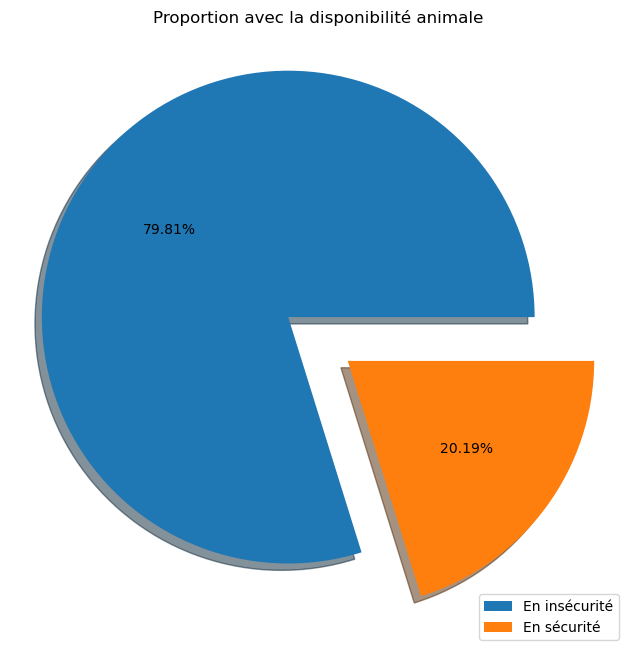

In [60]:
# Visu avec graph de  la proportion
a = 100-prct_theo_anim
b = prct_theo_anim
x = [a, b]

fig, ax = plt.subplots(1, 1, figsize = (14,8))

plt.pie(x, explode = (0.15, 0.15), autopct = '%1.2f%%', shadow = True) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc = 'lower right', labels = ['En insécurité', 'En sécurité'])

plt.title('Proportion avec la disponibilité animale')
plt.show()

### **3. Utilisation de la disponibilité intérieur**
---

In [61]:
# Production + Importation  - Exportation + Variation = Dispo = Aliments animaux + Autres utilisations + Nourriture + Pertes + Semence + Traitement -> Dispo-A = 0 / Dispo-B = 0


In [62]:
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [63]:
dispo_int = df_dispo_alim['Dispo_int_(milliers)'].sum()
alim_anim = df_dispo_alim['Aliments_animaux'].sum()
autres_util = df_dispo_alim['Autres_utilisations'].sum()
semences = df_dispo_alim['Semences_(milliers)'].sum()
traitement = df_dispo_alim['Traitement_(milliers)'].sum()
nourriture = df_dispo_alim['Nourriture_(milliers)'].sum()
pertes = df_dispo_alim['Pertes_(milliers)'].sum()

In [64]:
# Calcul des proportions
a = (alim_anim*100)/dispo_int
b = (autres_util*100)/dispo_int
c = (semences*100)/dispo_int
d = (traitement*100)/dispo_int
e = (nourriture*100)/dispo_int
f = (pertes*100)/dispo_int

data_dict = dict(zip(['Alimentation animale', 'Autres utilisations', 'Semences', 'Traitement', 'Nourriture', 'Pertes'],  [a, b, c, d, e, f])) # Mise des données sous  forme de dico
print(data_dict)
data_plot = pd.Series(data_dict) # Transformation du dico en série pour le graph
print(data_plot)

{'Alimentation animale': 13.242418464261426, 'Autres utilisations': 8.782856401374596, 'Semences': 1.5705258831511117, 'Traitement': 22.384895350733284, 'Nourriture': 49.51021393657058, 'Pertes': 4.606541541196999}
Alimentation animale    13.242418
Autres utilisations      8.782856
Semences                 1.570526
Traitement              22.384895
Nourriture              49.510214
Pertes                   4.606542
dtype: float64


In [65]:
print(a+b+c+d+e+f) # Vérification de l'équation au global

100.097451577288


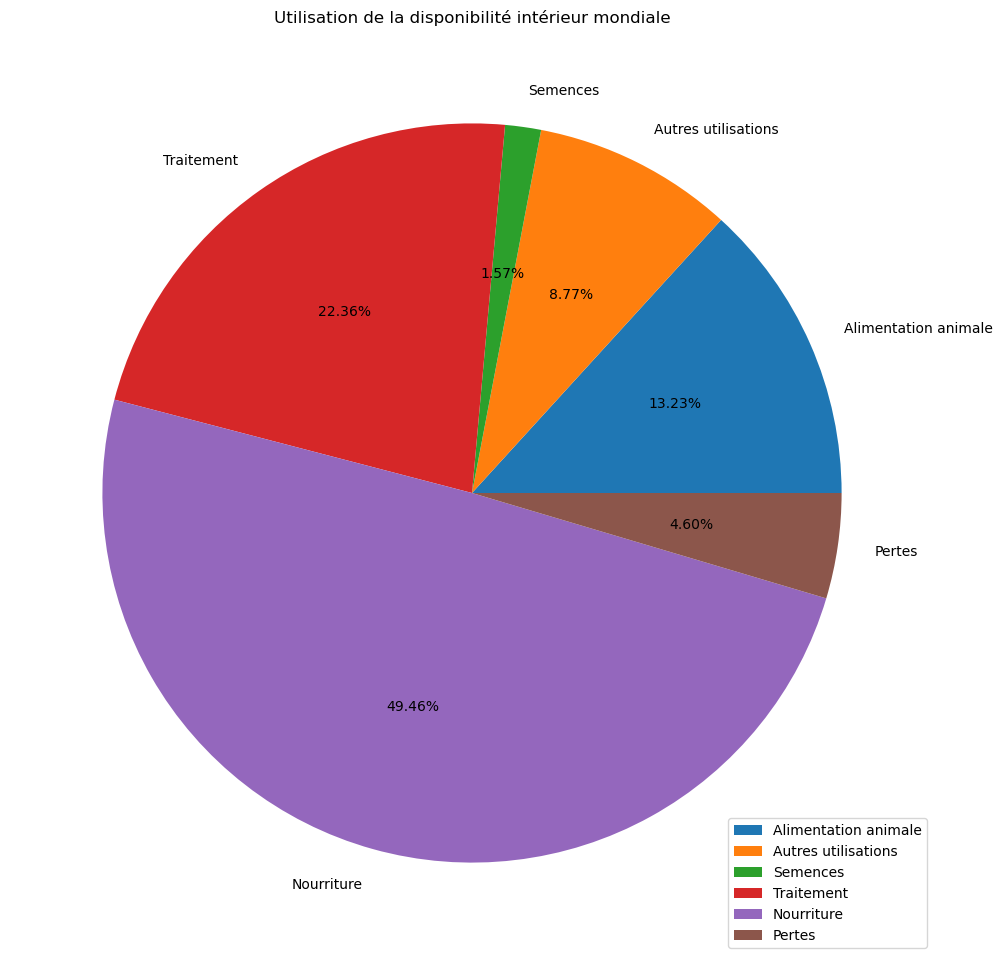

In [66]:
# Visu avec graph de  la proportion

fig, ax = plt.subplots(1, 1, figsize = (16,12))

plt.pie(data_plot, autopct = '%1.2f%%', shadow = False, labels = data_plot.index) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc = 'lower right')

plt.title("Utilisation de la disponibilité intérieur mondiale")
plt.show()


### **4. Utilisation des céréales**
---

In [67]:
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [68]:
df_util_cereales = df_dispo_alim.copy()

In [69]:
# Mask sur la liste de céréales spécifique
cereales = ['Avoine', 'Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Seigle', 'Sorgho']
mask_cereales = df_util_cereales['Produit'].isin(cereales)
df_util_cereales = df_util_cereales.loc[mask_cereales].copy()

In [70]:
# On refait un index propre
df_util_cereales = df_util_cereales.reset_index()

In [71]:
# Par produits au niveau mondial
df_util_c_gb = df_util_cereales.groupby('Produit').sum()
df_util_c_gb = df_util_c_gb.reset_index()

df_util_c_gb['% Anim'] = (df_util_c_gb['Aliments_animaux']*100)/df_util_c_gb['Dispo_int_(milliers)'] # Aliments pour animaux
df_util_c_gb['% Humain'] = (df_util_c_gb['Nourriture_(milliers)']*100)/df_util_c_gb['Dispo_int_(milliers)'] # Alimentation humaine
df_util_c_gb['% Pertes'] = (df_util_c_gb['Pertes_(milliers)']*100)/df_util_c_gb['Dispo_int_(milliers)'] # Pertes
df_util_c_gb['% Semences'] = (df_util_c_gb['Semences_(milliers)']*100)/df_util_c_gb['Dispo_int_(milliers)'] # Semences
df_util_c_gb['% Traitement'] = (df_util_c_gb['Traitement_(milliers)']*100)/df_util_c_gb['Dispo_int_(milliers)'] # Traitement
df_util_c_gb['% Autre Util'] = (df_util_c_gb['Autres_utilisations']*100)/df_util_c_gb['Dispo_int_(milliers)'] # Traitement



df_util_c_gb

,Produit,index,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),...,Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers),% Anim,% Humain,% Pertes,% Semences,% Traitement,% Autre Util
0,Avoine,1289763,16251.0,206.0,880.0,151.43,15.29,35.70,23407.0,3531.0,...,23816.0,2485.0,36.0,-577.0,69.427949,16.674499,2.195924,10.616482,0.153800,0.880079
1,Blé,1363094,129668.0,22424.0,96132.0,12339.51,548.76,2809.21,679498.0,198380.0,...,708443.0,34283.0,7877.0,-15948.0,19.082911,67.376799,4.051520,5.045342,1.159238,3.300083
2,"Céréales, Autres",1349964,19035.0,1388.0,1483.0,193.74,5.46,40.52,27485.0,2540.0,...,28412.0,1203.0,160.0,-1267.0,69.255958,19.370566,2.856103,4.376933,0.582136,5.050027
3,Maïs,1369451,546116.0,189386.0,30903.0,3690.37,271.50,771.12,955799.0,128787.0,...,1017029.0,6837.0,47648.0,-55136.0,57.137118,13.097314,4.258322,0.715318,4.985149,19.814417
4,Millet,1218064,3306.0,196.0,3966.0,513.09,37.27,96.11,29911.0,276.0,...,28909.0,682.0,403.0,933.0,11.052790,77.028518,7.609241,2.280098,1.347330,0.655277
5,Orge,1357246,92658.0,654.0,1814.0,263.60,7.35,52.28,140439.0,41585.0,...,142462.0,8804.0,26910.0,876.0,65.977399,4.837688,3.295381,6.268914,19.161344,0.465683
6,Riz (Eq Blanchi),1373951,33594.0,18464.0,53024.0,5384.46,123.95,1027.25,475656.0,41445.0,...,495447.0,12194.0,6740.0,-15958.0,7.062667,79.319088,5.755840,2.563617,1.416990,3.881797
7,Seigle,1186078,8099.0,20.0,1967.0,263.36,8.62,51.56,16567.0,2372.0,...,16711.0,1262.0,1120.0,-25.0,48.886340,33.210599,3.392286,7.617553,6.760427,0.120722
8,Sorgho,1215022,24808.0,2049.0,4952.0,614.02,48.34,146.16,58237.0,6388.0,...,62116.0,788.0,3695.0,-3913.0,42.598348,41.473634,4.715215,1.353092,6.344764,3.518382


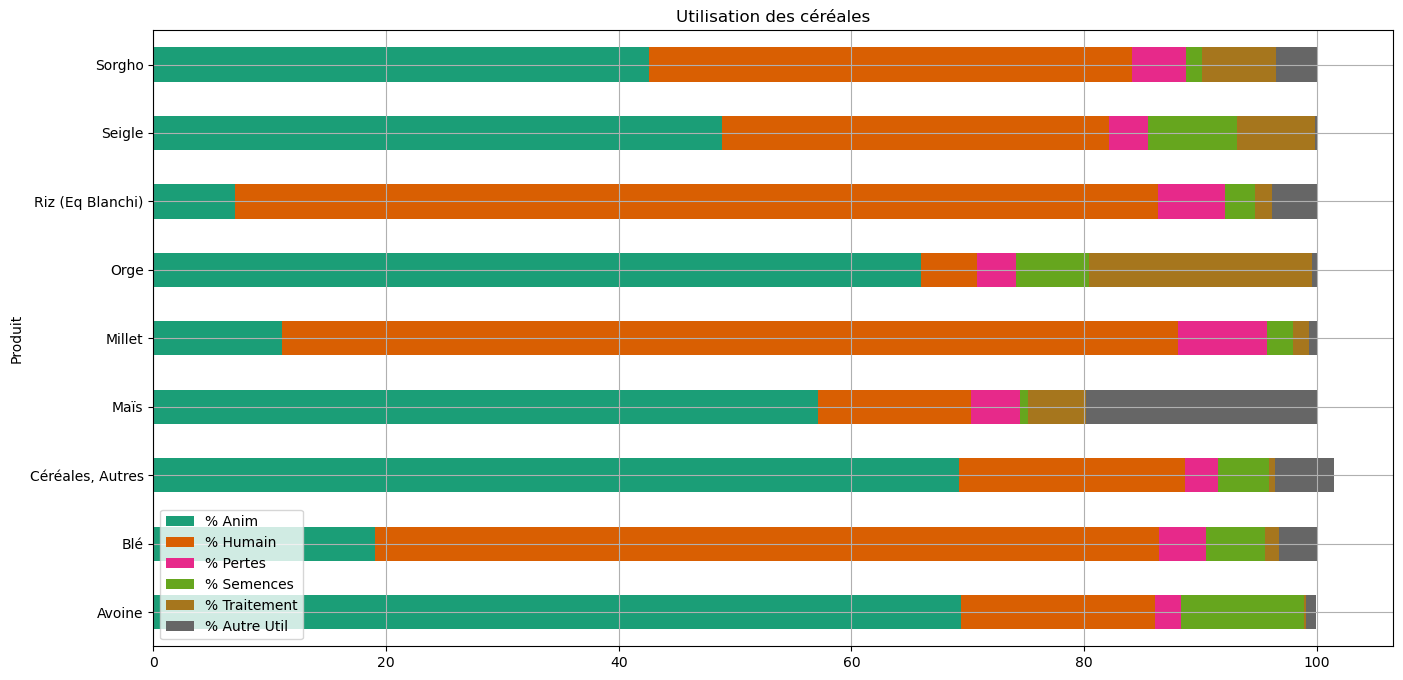

In [72]:
# Bargraph empilé sur l'utilisation des céréales
# On prend juste les données qui nous intéressent en passant une list sur y
df_util_c_gb.plot(x = 'Produit', y = ['% Anim', '% Humain', '% Pertes', '% Semences', '% Traitement','% Autre Util'],
                  kind = 'barh', stacked = True, title = 'Utilisation des céréales', mark_right = True, figsize = (16, 8), grid = True, colormap='Dark2')
plt.legend(loc = 'lower left')

In [73]:
# Céréales, autres légèrement > 100%, probablement les arrondis dans les données fournies mais ne choque pas pour l'analyse

### **5. Cas du manioc en Thaïlande**
---

In [74]:
# Utilisation du manioc

In [75]:
data_dispo_alim = pd.read_csv('dispo_alimentaire.csv') # Disponibilté alimentaire

In [76]:
df_util_manioc =  df_dispo_alim
df_util_manioc.head()

,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [77]:
# Récup de données sur le pays en question
df_sous_nut_pop_2017.loc[(df_sous_nut_pop_2017['Zone'] == 'Thaïlande')]

,Zone,Sous_nutrition_(milliers),Année,Population_(milliers),Proportion_%
185,Thaïlande,6200.0,2017,69209.81,8.96


In [78]:
# Mask pour avoir le pays et le produit à checker
pays = ['Thaïlande']
product = ['Manioc']
mask_pays = df_util_manioc['Zone'].isin(pays)
mask_product = df_util_manioc['Produit'].isin(product)
df_util_manioc = df_util_manioc.loc[mask_pays & mask_product]
df_util_manioc = df_util_manioc.reset_index()
df_util_manioc

,index,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
0,13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [79]:
# Calcul de l'utilisation de la dispo
df_util_manioc['%_Alim_Anim'] = round((df_util_manioc['Aliments_animaux']*100)/df_util_manioc['Dispo_int_(milliers)'], 2)
df_util_manioc['%_Autres_Util'] = round((df_util_manioc['Autres_utilisations']*100)/df_util_manioc['Dispo_int_(milliers)'], 2)
df_util_manioc['%_Nourriture'] = round((df_util_manioc['Nourriture_(milliers)']*100)/df_util_manioc['Dispo_int_(milliers)'], 2)
df_util_manioc['%_Pertes'] = round((df_util_manioc['Pertes_(milliers)']*100)/df_util_manioc['Dispo_int_(milliers)'], 2)
df_util_manioc['%_Semences'] = round((df_util_manioc['Semences_(milliers)']*100)/df_util_manioc['Dispo_int_(milliers)'], 2)
df_util_manioc['%_Traitement'] = round((df_util_manioc['Traitement_(milliers)']*100)/df_util_manioc['Dispo_int_(milliers)'], 2)

# df_util_manioc.drop(['Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)'], axis = 1, inplace = True)
print('Utilisation du manioc en Thaïlande')
df_util_manioc

Utilisation du manioc en Thaïlande


,index,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),...,Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers),%_Alim_Anim,%_Autres_Util,%_Nourriture,%_Pertes,%_Semences,%_Traitement
0,13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,...,30228.0,NaN,0.0,0.0,28.74,33.22,13.9,24.12,NaN,0.0


In [80]:
# Mise en avant de la part de l'export
export = round((df_util_manioc['Export_(milliers)']*100)/df_util_manioc['Production_(milliers)'], 2)
nourriture = round((df_util_manioc['Nourriture_(milliers)']*100)/df_util_manioc['Production_(milliers)'], 2)

print('La Thaïlande exporte ', export[0], '% de sa production')
print('La Thaïlande utilise ', nourriture[0], '% de sa production pour la nourriture')


La Thaïlande exporte  83.41 % de sa production
La Thaïlande utilise  2.88 % de sa production pour la nourriture


In [81]:
# Calcul des proportions pour graph, reprise du code précédent
a = df_util_manioc['%_Alim_Anim'].sum()
b = df_util_manioc['%_Autres_Util'].sum()
c = df_util_manioc['%_Nourriture'].sum()
d = df_util_manioc['%_Pertes'].sum()
e = df_util_manioc['%_Semences'].sum()
f = df_util_manioc['%_Traitement'].sum()
print(a+b+c+d+e+f) # Vérif du calcul
data_dict = dict(zip(['Alimentation animale', 'Autres utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement'],  [a, b, c, d, e, f])) # Mise des données sous  forme de dico
print(data_dict)
data_plot = pd.Series(data_dict) # Transformation du dico en série pour le graph
print(data_plot)

99.98
{'Alimentation animale': 28.74, 'Autres utilisations': 33.22, 'Nourriture': 13.9, 'Pertes': 24.12, 'Semences': 0.0, 'Traitement': 0.0}
Alimentation animale    28.74
Autres utilisations     33.22
Nourriture              13.90
Pertes                  24.12
Semences                 0.00
Traitement               0.00
dtype: float64


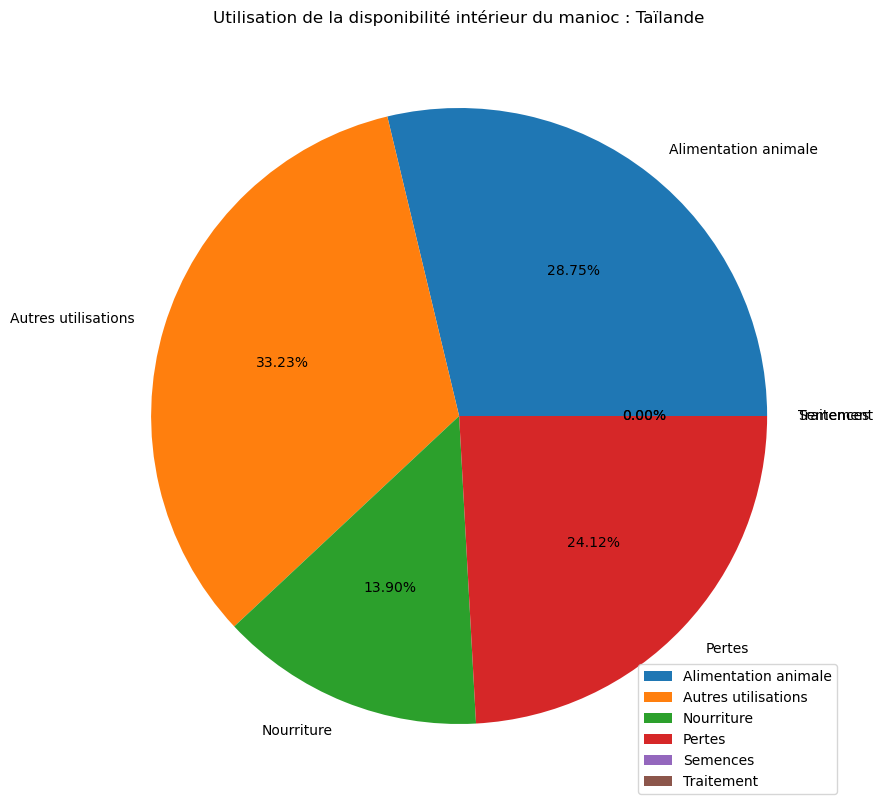

In [82]:
# Visu avec graph de  la proportion
plt.subplots(figsize=(18, 10))

plt.pie(data_plot, autopct = '%1.2f%%', shadow = False, labels = data_plot.index) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc = 'lower right')

plt.title("Utilisation de la disponibilité intérieur du manioc : Taïlande")
plt.show()

### **6. Aide alimentaire**
---

In [83]:
df = df_aide_alim.groupby(['Pays_beneficiaire', 'Année']).sum().copy() # Par pays par années
df = df.reset_index()
df

,Pays_beneficiaire,Année,Qte_aide_(tonnes)
0,Afghanistan,2013,128238
1,Afghanistan,2014,57214
2,Algérie,2013,35234
3,Algérie,2014,18980
4,Algérie,2015,17424
...,...,...,...
223,Égypte,2013,1122
224,Équateur,2013,1362
225,Éthiopie,2013,591404
226,Éthiopie,2014,586624


In [84]:
# Vérification de l'étendue sur les années
print(df_aide_alim['Année'].min())
print(df_aide_alim['Année'].max())

2013
2016


In [85]:
df.sort_values(by = ['Année', 'Qte_aide_(tonnes)'], ascending = False) # Par années par quantité

,Pays_beneficiaire,Année,Qte_aide_(tonnes)
217,Yémen,2016,465574
160,République arabe syrienne,2016,118558
138,Niger,2016,92742
79,Haïti,2016,12462
5,Algérie,2016,9476
...,...,...,...
204,Tadjikistan,2013,746
88,Iraq,2013,666
218,Zambie,2013,328
211,Timor-Leste,2013,116


In [86]:
df_aide_alim_gb = df_aide_alim.groupby(['Pays_beneficiaire']).agg({'Année' : 'min', 'Qte_aide_(tonnes)': 'sum'}).reset_index() # Somme des aides depuis 2013
df_aide_alim_gb.sort_values(by = 'Qte_aide_(tonnes)', ascending = False).head(10) # Top 10 des pays qui ont reçu le plus d'aides

,Pays_beneficiaire,Année,Qte_aide_(tonnes)
50,République arabe syrienne,2013,1858943
75,Éthiopie,2013,1381294
70,Yémen,2013,1206484
61,Soudan du Sud,2013,695248
60,Soudan,2013,669784
30,Kenya,2013,552836
3,Bangladesh,2013,348188
59,Somalie,2013,292678
53,République démocratique du Congo,2013,288502
43,Niger,2013,276344


In [87]:
df_aide_alim_gb.sort_values(by = 'Qte_aide_(tonnes)', ascending = True).head(10) # Top 10 des pays qui ont reçu le moins d'aides

,Pays_beneficiaire,Année,Qte_aide_(tonnes)
5,Bolivie (État plurinational de),2014,6
24,Géorgie,2013,70
67,Timor-Leste,2013,116
69,Vanuatu,2015,802
73,Égypte,2013,1122
11,"Chine, continentale",2014,1298
74,Équateur,2013,1362
57,Sao Tomé-et-Principe,2013,1826
65,Tadjikistan,2013,2028
4,Bhoutan,2013,2666


In [88]:
mask_pays = df_util_manioc['Zone'].isin(pays)
mask_product = df_util_manioc['Produit'].isin(product)
df_util_manioc = df_util_manioc.loc[mask_pays & mask_product]

In [89]:
list_pays = ['République arabe syrienne', 'Éthiopie', 'Yémen']
mask = df['Pays_beneficiaire'].isin(list_pays)
df_top = df.loc[mask] # Evolution des aides alim du top 3 des pays en ayant le plus bénéficer
print("Evolution de l'aide par année du TOP3")
df_top

Evolution de l'aide par année du TOP3


,Pays_beneficiaire,Année,Qte_aide_(tonnes)
157,République arabe syrienne,2013,563566
158,République arabe syrienne,2014,651870
159,République arabe syrienne,2015,524949
160,République arabe syrienne,2016,118558
214,Yémen,2013,264764
215,Yémen,2014,103840
216,Yémen,2015,372306
217,Yémen,2016,465574
225,Éthiopie,2013,591404
226,Éthiopie,2014,586624


### **7. Disponibilité par habitants**
---

In [90]:
df_dispo_alim

,Zone,Produit,Origine,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [91]:
df_dispo_alim_hab = df_dispo_alim.groupby('Zone').sum().copy()

# Nettoyage du df
col_del = ['Aliments_animaux', 'Autres_utilisations', 'Dispo_mg_(g_pers_j)', 
           'Dispo_prot_(g_pers_j)', 'Nourriture_(milliers)', 'Pertes_(milliers)', 
           'Semences_(milliers)', 'Traitement_(milliers)', 'Variation_stock_(milliers)']

df_dispo_alim_hab.drop(col_del, axis = 1, inplace = True)
df_dispo_alim_hab

,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Production_(milliers)
Zone,,,,,,
Afghanistan,2087.0,351.41,13515.0,278.0,2988.0,11171.0
Afrique du Sud,3020.0,564.80,61256.0,11674.0,7517.0,63263.0
Albanie,3188.0,1095.54,4758.0,94.0,933.0,3964.0
Algérie,3293.0,809.13,42630.0,655.0,17403.0,26359.0
Allemagne,3503.0,957.52,162275.0,57431.0,65353.0,154547.0
...,...,...,...,...,...,...
Émirats arabes unis,3275.0,700.24,11850.0,4343.0,15327.0,1192.0
Équateur,2346.0,544.91,18614.0,8002.0,1725.0,24337.0
États-Unis d'Amérique,3682.0,1002.39,777992.0,163524.0,81887.0,894668.0


In [92]:
print('Pays avec le plus de disponibilité kg/pers/an')
df_dispo_alim_hab.sort_values(by = 'Dispo_qte_(kg_pers_an)', ascending = False).head(10)

Pays avec le plus de disponibilité kg/pers/an


,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Production_(milliers)
Zone,,,,,,
Monténégro,3490.0,1210.41,1012.0,41.0,458.0,591.0
Luxembourg,3540.0,1150.66,802.0,821.0,1076.0,593.0
Irlande,3602.0,1150.15,10738.0,6828.0,6254.0,11501.0
Albanie,3188.0,1095.54,4758.0,94.0,933.0,3964.0
Finlande,3366.0,1093.77,10034.0,2039.0,3284.0,9288.0
Grèce,3394.0,1070.90,22584.0,4539.0,6756.0,20568.0
Pays-Bas,3222.0,1069.22,42461.0,52179.0,52910.0,41636.0
Autriche,3770.0,1069.20,19308.0,6733.0,8463.0,18129.0
Lituanie,3414.0,1050.07,7467.0,5963.0,3060.0,9761.0


In [93]:
print('Pays avec le moins de disponibilité kg/pers/an')
df_dispo_alim_hab.sort_values(by = 'Dispo_qte_(kg_pers_an)', ascending = True).head(10)

Pays avec le moins de disponibilité kg/pers/an


,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Production_(milliers)
Zone,,,,,,
Tchad,2109.0,319.45,5304.0,0.0,290.0,5153.0
Zimbabwe,2113.0,336.59,9507.0,278.0,1342.0,7914.0
Zambie,1924.0,350.12,10041.0,675.0,380.0,10526.0
Afghanistan,2087.0,351.41,13515.0,278.0,2988.0,11171.0
Éthiopie,2129.0,354.55,44014.0,941.0,1711.0,46102.0
Guinée-Bissau,2288.0,358.48,786.0,201.0,167.0,835.0
Bangladesh,2453.0,364.54,72757.0,328.0,10013.0,68294.0
Timor-Leste,2129.0,369.10,447.0,23.0,100.0,371.0
Yémen,2217.0,375.41,9782.0,719.0,6786.0,4125.0


# Test dashboard sur différents pays

In [94]:
# En plus de ce qui est demander mais afin de faire une compilation de toutes les données travaillées

In [95]:
df_dispo = df_dispo_alim.copy()
df_dispo_gb = df_dispo.groupby('Zone').sum().copy()
df_dispo_gb

,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers)
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


In [96]:
df_sn = df_sous_nut.loc[df_sous_nut['Année'] == 2017].copy() # On prend la sous nutrition de 2017 avec le nettoyage rapide pour les tests
df_sn

,Zone,Année,Sous_nutrition_(milliers)
4,Afghanistan,2017,10500.0
10,Afrique du Sud,2017,3100.0
16,Albanie,2017,100.0
22,Algérie,2017,1300.0
28,Allemagne,2017,NaN
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8000.0
1198,Viet Nam,2017,6500.0
1204,Yémen,2017,NaN
1210,Zambie,2017,NaN


In [97]:
df_dispo_gb_pop = pd.merge(df_dispo_gb, df_pop_2017, how = 'left', on = ['Zone']) # Pour garder les pays ou j'ai de la dispo donc merge sur left

df_dispo_gb_pop

,Zone,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers),Année,Population_(milliers)
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2017.0,36296.113
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2017.0,57009.756
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2017.0,2884.169
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2017.0,41389.189
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2017.0,82658.409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,2017.0,9487.203
170,Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0,2017.0,16785.361
171,États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0,2017.0,325084.756
172,Éthiopie,685.0,3641.0,2129.0,354.55,25.89,60.39,44014.0,941.0,1711.0,33361.0,2256.0,46102.0,640.0,3443.0,-2857.0,2017.0,106399.924


In [98]:
df_dispo_gb_pop_sn = pd.merge(df_dispo_gb_pop, df_sn, how = 'left', on = ["Zone"]) # On rajoute les données de sous nutrition toujours sur left pour avoir une cohérence dans le déroulé
df_dispo_gb_pop_sn.drop(['Année_x', 'Année_y'], axis = 1, inplace = True)
df_dispo_gb_pop_sn

,Zone,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Nourriture_(milliers),Pertes_(milliers),Production_(milliers),Semences_(milliers),Traitement_(milliers),Variation_stock_(milliers),Population_(milliers),Sous_nutrition_(milliers)
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,36296.113,10500.0
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,57009.756,3100.0
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2884.169,100.0
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,41389.189,1300.0
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,82658.409,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,9487.203,300.0
170,Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0,16785.361,1500.0
171,États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0,325084.756,NaN
172,Éthiopie,685.0,3641.0,2129.0,354.55,25.89,60.39,44014.0,941.0,1711.0,33361.0,2256.0,46102.0,640.0,3443.0,-2857.0,106399.924,21100.0


In [99]:
df_dispo_gb_pop_sn['% Sous Nutr'] = round((df_dispo_gb_pop_sn['Sous_nutrition_(milliers)']*100)/(df_dispo_gb_pop_sn['Population_(milliers)']), 2) # Proportion de sous nutrition
df_dispo_gb_pop_sn['% Théo'] = round((((df_dispo_gb_pop_sn['Population_(milliers)']*df_dispo_gb_pop_sn['Dispo_kcal_(kcal_pers_jour)'])/2400)*100)/(df_dispo_gb_pop_sn['Population_(milliers)']), 2) # % De personnes théo pouvant être nourries

# Faire tout les calculs intéressant, nettoyer le df final pour avoir quelque chose de propre
df_dispo_gb_pop_sn['% Alim Anim'] = round((df_dispo_gb_pop_sn['Aliments_animaux']*100)/df_dispo_gb_pop_sn['Dispo_int_(milliers)'], 2)
df_dispo_gb_pop_sn['% Autres Util'] = round((df_dispo_gb_pop_sn['Autres_utilisations']*100)/df_dispo_gb_pop_sn['Dispo_int_(milliers)'], 2)
df_dispo_gb_pop_sn['% Nourriture'] = round((df_dispo_gb_pop_sn['Nourriture_(milliers)']*100)/df_dispo_gb_pop_sn['Dispo_int_(milliers)'], 2)
df_dispo_gb_pop_sn['% Pertes'] = round((df_dispo_gb_pop_sn['Pertes_(milliers)']*100)/df_dispo_gb_pop_sn['Dispo_int_(milliers)'], 2)
df_dispo_gb_pop_sn['% Semences'] = round((df_dispo_gb_pop_sn['Semences_(milliers)']*100)/df_dispo_gb_pop_sn['Dispo_int_(milliers)'], 2)
df_dispo_gb_pop_sn['% Traitement'] = round((df_dispo_gb_pop_sn['Traitement_(milliers)']*100)/df_dispo_gb_pop_sn['Dispo_int_(milliers)'], 2)
df_dispo_gb_pop_sn['% Export_Prod'] = round((df_dispo_gb_pop_sn['Export_(milliers)']*100)/df_dispo_gb_pop_sn['Production_(milliers)'], 2)

df_dispo_gb_pop_sn['Verif'] = df_dispo_gb_pop_sn['% Alim Anim']+df_dispo_gb_pop_sn['% Autres Util']+df_dispo_gb_pop_sn['% Nourriture']+df_dispo_gb_pop_sn['% Pertes']+df_dispo_gb_pop_sn['% Semences']+df_dispo_gb_pop_sn['% Traitement'] # Vérification de l'équation par pays
df_dispo_gb_pop_sn

,Zone,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),...,% Sous Nutr,% Théo,% Alim Anim,% Autres Util,% Nourriture,% Pertes,% Semences,% Traitement,% Export_Prod,Verif
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,...,28.93,86.96,5.68,3.07,79.43,8.40,2.92,0.47,2.49,99.97
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,...,5.44,125.83,8.67,1.43,48.67,3.58,0.41,37.25,18.45,100.01
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,...,3.47,132.83,13.87,3.66,73.06,5.80,1.16,2.37,2.37,99.92
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,...,3.14,137.21,10.21,4.00,74.43,8.80,1.05,1.49,2.48,99.98
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,...,NaN,145.96,18.62,4.75,48.83,2.33,0.96,24.55,37.16,100.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,...,3.16,136.46,9.91,22.69,55.26,5.95,0.03,6.78,364.35,100.62
170,Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,...,8.94,97.75,6.45,10.26,46.06,3.80,0.74,33.31,32.88,100.62
171,États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,...,NaN,153.42,19.08,19.88,41.25,0.92,1.34,18.12,18.28,100.59
172,Éthiopie,685.0,3641.0,2129.0,354.55,25.89,60.39,44014.0,941.0,1711.0,...,19.83,88.71,1.56,8.27,75.80,5.13,1.45,7.82,2.04,100.03


In [100]:
df_dispo_gb_pop_sn.loc[(df_dispo_gb_pop_sn['Verif'] > 101.0) | (df_dispo_gb_pop_sn['Verif'] < 99.0)] # Check outliers, outlier can be caused by round in base values, check for +/- 2%

,Zone,Aliments_animaux,Autres_utilisations,Dispo_kcal_(kcal_pers_jour),Dispo_qte_(kg_pers_an),Dispo_mg_(g_pers_j),Dispo_prot_(g_pers_j),Dispo_int_(milliers),Export_(milliers),Import_(milliers),...,% Sous Nutr,% Théo,% Alim Anim,% Autres Util,% Nourriture,% Pertes,% Semences,% Traitement,% Export_Prod,Verif
6,Antigua-et-Barbuda,0.0,20.0,2416.0,694.17,89.76,83.49,79.0,0.0,63.0,...,NaN,100.67,0.00,25.32,73.42,0.00,0.00,0.00,0.00,98.74
7,Arabie saoudite,11841.0,159.0,3255.0,622.78,107.83,91.59,31274.0,4707.0,27726.0,...,4.83,135.62,37.86,0.51,57.42,3.33,0.31,1.92,53.02,101.35
18,Bermudes,1.0,22.0,2668.0,840.70,109.93,90.36,59.0,24.0,77.0,...,NaN,111.17,1.69,37.29,86.44,0.00,0.00,0.00,400.00,125.42
22,Brunéi Darussalam,9.0,15.0,2985.0,640.91,82.46,93.29,294.0,11.0,244.0,...,NaN,124.37,3.06,5.10,88.78,1.36,0.34,0.00,18.33,98.64
40,Costa Rica,813.0,170.0,2846.0,681.79,90.42,75.05,10049.0,6291.0,2099.0,...,4.04,118.58,8.09,1.69,33.04,10.53,0.52,48.10,44.92,101.97
56,Gambie,15.0,129.0,2621.0,380.93,70.98,61.31,940.0,46.0,419.0,...,13.55,109.21,1.60,13.72,74.57,3.51,1.60,6.06,10.07,101.06
58,Grenade,14.0,10.0,2442.0,595.60,86.76,69.20,96.0,3.0,48.0,...,NaN,101.75,14.58,10.42,62.50,3.12,0.00,8.33,6.38,98.95
72,Irlande,3758.0,1120.0,3602.0,1150.15,125.69,109.91,10738.0,6828.0,6254.0,...,NaN,150.08,35.00,10.43,49.54,2.20,0.83,3.72,59.37,101.72
76,Jamaïque,169.0,393.0,2742.0,696.28,78.39,76.93,4068.0,311.0,1223.0,...,10.27,114.25,4.15,9.66,47.64,2.16,0.17,37.56,9.79,101.34
94,Maldives,0.0,56.0,2733.0,821.36,62.93,122.32,337.0,54.0,252.0,...,NaN,113.87,0.00,16.62,82.20,0.00,0.00,0.00,37.76,98.82


In [101]:
# Nettoyage des colonnes garder juste les indicateurs pertinents
col_del = ['Aliments_animaux', 'Autres_utilisations', 'Dispo_qte_(kg_pers_an)', 'Dispo_mg_(g_pers_j)', 
           'Dispo_prot_(g_pers_j)', 'Nourriture_(milliers)', 'Pertes_(milliers)', 
           'Semences_(milliers)', 'Traitement_(milliers)', 'Variation_stock_(milliers)']

df_dispo_gb_pop_sn.drop(col_del, axis = 1, inplace = True)
df_dispo_gb_pop_sn

,Zone,Dispo_kcal_(kcal_pers_jour),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Production_(milliers),Population_(milliers),Sous_nutrition_(milliers),% Sous Nutr,% Théo,% Alim Anim,% Autres Util,% Nourriture,% Pertes,% Semences,% Traitement,% Export_Prod,Verif
0,Afghanistan,2087.0,13515.0,278.0,2988.0,11171.0,36296.113,10500.0,28.93,86.96,5.68,3.07,79.43,8.40,2.92,0.47,2.49,99.97
1,Afrique du Sud,3020.0,61256.0,11674.0,7517.0,63263.0,57009.756,3100.0,5.44,125.83,8.67,1.43,48.67,3.58,0.41,37.25,18.45,100.01
2,Albanie,3188.0,4758.0,94.0,933.0,3964.0,2884.169,100.0,3.47,132.83,13.87,3.66,73.06,5.80,1.16,2.37,2.37,99.92
3,Algérie,3293.0,42630.0,655.0,17403.0,26359.0,41389.189,1300.0,3.14,137.21,10.21,4.00,74.43,8.80,1.05,1.49,2.48,99.98
4,Allemagne,3503.0,162275.0,57431.0,65353.0,154547.0,82658.409,NaN,NaN,145.96,18.62,4.75,48.83,2.33,0.96,24.55,37.16,100.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,3275.0,11850.0,4343.0,15327.0,1192.0,9487.203,300.0,3.16,136.46,9.91,22.69,55.26,5.95,0.03,6.78,364.35,100.62
170,Équateur,2346.0,18614.0,8002.0,1725.0,24337.0,16785.361,1500.0,8.94,97.75,6.45,10.26,46.06,3.80,0.74,33.31,32.88,100.62
171,États-Unis d'Amérique,3682.0,777992.0,163524.0,81887.0,894668.0,325084.756,NaN,NaN,153.42,19.08,19.88,41.25,0.92,1.34,18.12,18.28,100.59
172,Éthiopie,2129.0,44014.0,941.0,1711.0,46102.0,106399.924,21100.0,19.83,88.71,1.56,8.27,75.80,5.13,1.45,7.82,2.04,100.03


## Choix pays

In [102]:
# Pour faire un visu sur un ou plusieurs pays en particulier
pays = ['France']

mask_pays = df_dispo_gb_pop_sn['Zone'].isin(pays)

# On sort les différentes données sur les pays sélectionnés
df_indic_pays = df_dispo_gb_pop_sn.loc[mask_pays]

print('Etat du pays : ' + ' - '.join(pays))
df_indic_pays

Etat du pays : France


,Zone,Dispo_kcal_(kcal_pers_jour),Dispo_int_(milliers),Export_(milliers),Import_(milliers),Production_(milliers),Population_(milliers),Sous_nutrition_(milliers),% Sous Nutr,% Théo,% Alim Anim,% Autres Util,% Nourriture,% Pertes,% Semences,% Traitement,% Export_Prod,Verif
53,France,3482.0,146905.0,65945.0,33769.0,178136.0,64842.509,NaN,NaN,145.08,15.5,9.81,41.03,2.22,1.12,30.61,37.02,100.29


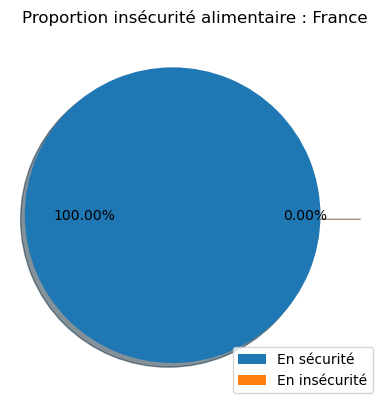

In [103]:
# Visu avec graph de  la proportion
a = 100-(df_indic_pays['% Sous Nutr'].sum()/len(pays))
b = df_indic_pays['% Sous Nutr'].sum()/len(pays)
x = [a, b]

plt.pie(x, explode = (0.15, 0.15), autopct = '%1.2f%%', shadow = True) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc = 'lower right', labels = ['En sécurité', 'En insécurité'])

plt.title('Proportion insécurité alimentaire : ' + ' - '.join(pays))
plt.show()

In [104]:
# Calcul des proportions, moyenne sur les pays sélectionnés
a = df_indic_pays['% Alim Anim'].mean()
b = df_indic_pays['% Autres Util'].mean()
c = df_indic_pays['% Nourriture'].mean()
d = df_indic_pays['% Pertes'].mean()
e = df_indic_pays['% Semences'].mean()
f = df_indic_pays['% Traitement'].mean()
print(a+b+c+d+e+f) # Vérification des pourcentages, environ = 100 avec les erreurs d'arrondis
data_dict = dict(zip(['Alimentation animale', 'Autres utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement'],  [a, b, c, d, e, f])) # Mise des données sous  forme de dico
print(data_dict)
data_plot = pd.Series(data_dict) # Transformation du dico en série pour le graph
print(data_plot)

100.29
{'Alimentation animale': 15.5, 'Autres utilisations': 9.81, 'Nourriture': 41.03, 'Pertes': 2.22, 'Semences': 1.12, 'Traitement': 30.61}
Alimentation animale    15.50
Autres utilisations      9.81
Nourriture              41.03
Pertes                   2.22
Semences                 1.12
Traitement              30.61
dtype: float64


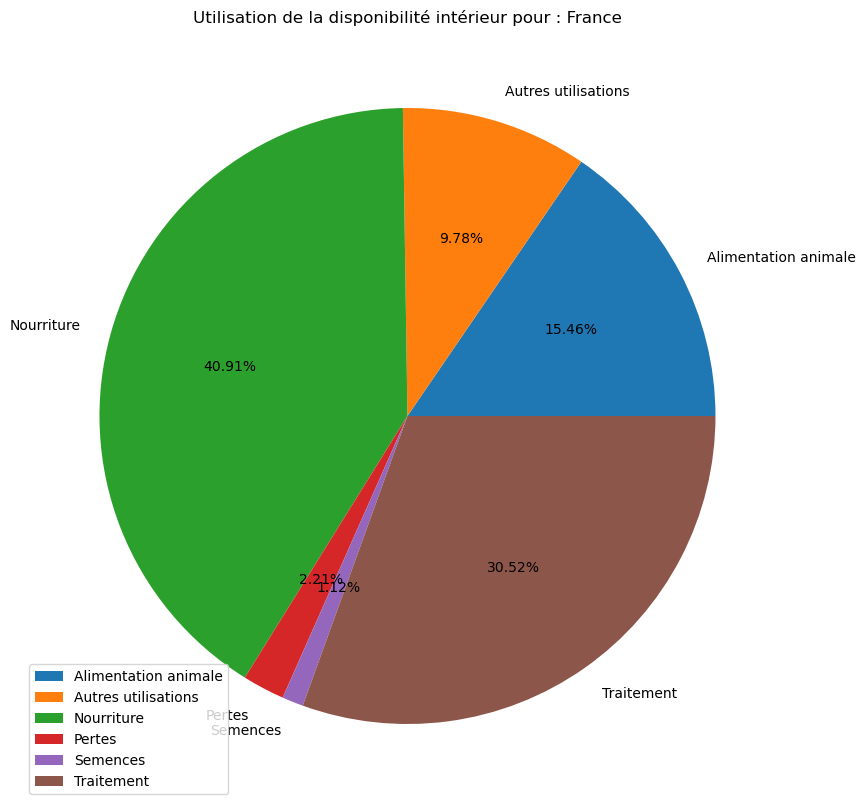

In [105]:
# Visu avec graph de la proportion
plt.subplots(figsize=(16, 10))

plt.pie(data_plot, autopct = '%1.2f%%', shadow = False, labels = data_plot.index) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc = 'lower left')

plt.title('Utilisation de la disponibilité intérieur pour : ' + ' - '.join(pays))
plt.show()

In [106]:
# Réup de la carte
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")] # On enlève la ou il n'y a personne

In [107]:
# Récup des codes iso a3
data_code_pays = pd.read_csv('code_pays.csv', header=None) # Code  pays

In [108]:
# Ajout des pays avec iso a3
world_code = pd.merge(left=world, right=data_code_pays, how='left', left_on='iso_a3', right_on=3, indicator=True) # Récupération des noms avec iso_a3 et visu du merge

In [109]:
# Merge avec les indic pays pour les localiser si dispo dans world
df_world_loc = pd.merge(left=world_code, right=df_indic_pays, how='left', left_on=4, right_on='Zone') # Merge avec la prop de sous nutrition / pays


Text(0.5, 1.0, 'Localisation du/des pays : France')

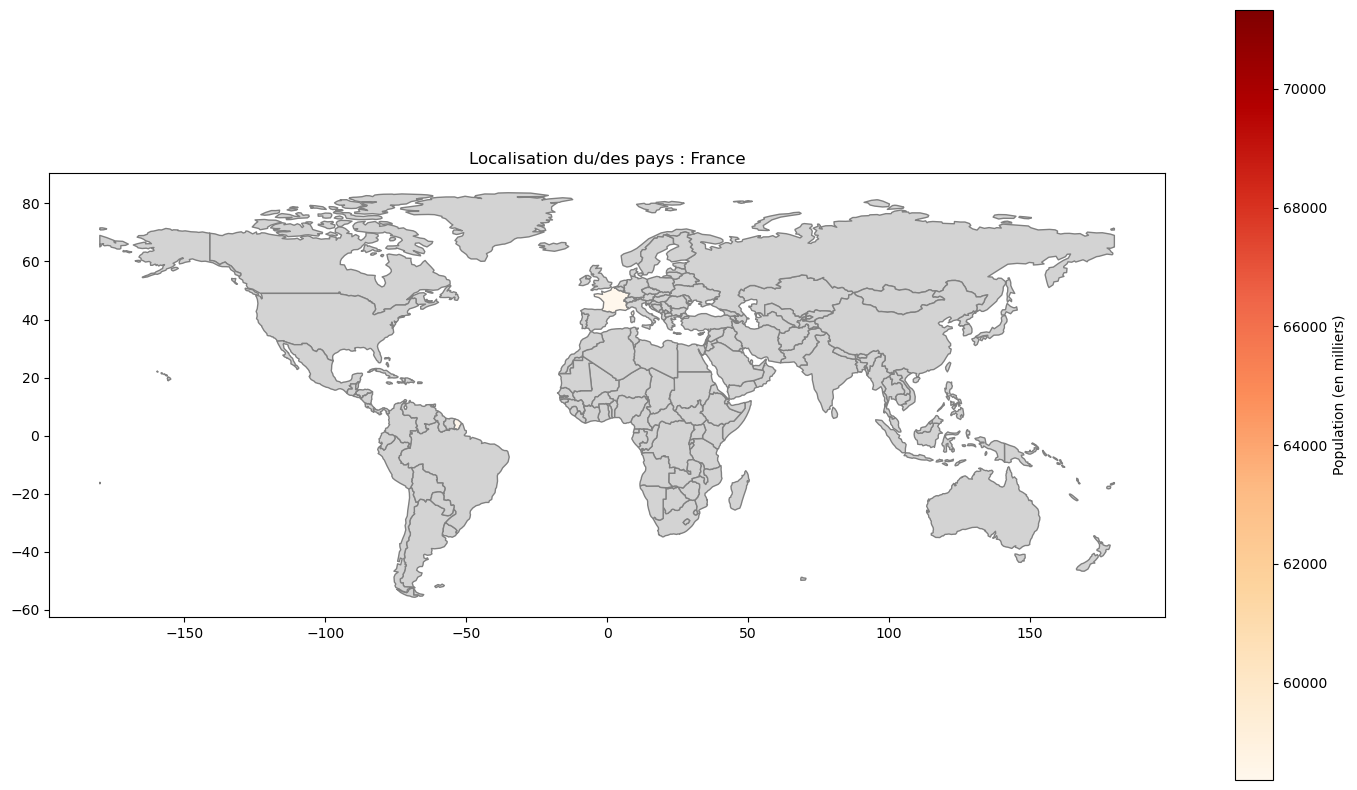

In [110]:
# Affichage des pays sur la mapemonde via leurs population si ils sont dispo avec le merge avec world avec l'iso a3
fig, ax = plt.subplots(1, 1, figsize = (18,10))

df_world_loc.plot(column='Population_(milliers)', ax = ax, legend = True, legend_kwds = {'label' : 'Population (en milliers)'},
                  missing_kwds = {'color': 'lightgrey', 'edgecolor': 'grey', 'hatch': '', 'label': 'Missing values'}, cmap = 'OrRd', edgecolor = 'grey')
plt.title('Localisation du/des pays : ' + '-'.join(pays))

In [111]:
# Thanks for reading my code
# D.